In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
def display_img(img):
    fig=plt.figure(figsize=(12,8))
    ax=fig.add_subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.show()
    plt.close()

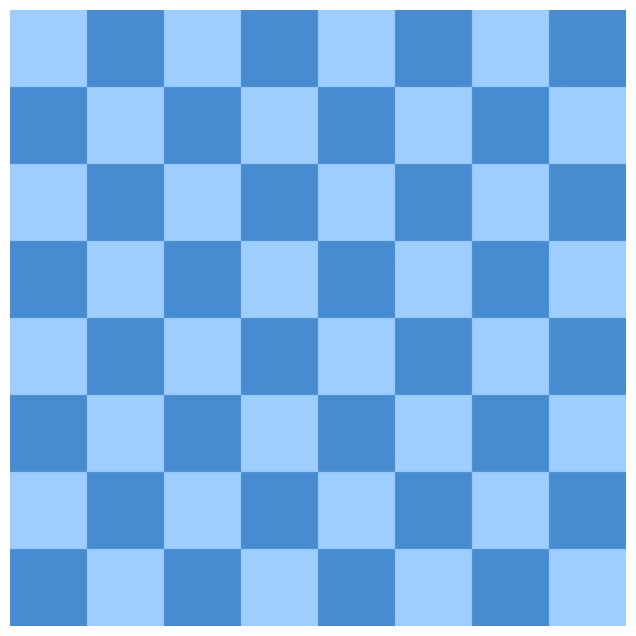

In [49]:
flat_chess_bgr = cv2.imread('Data/flat_chessboard.png')

display_img(flat_chess_bgr)

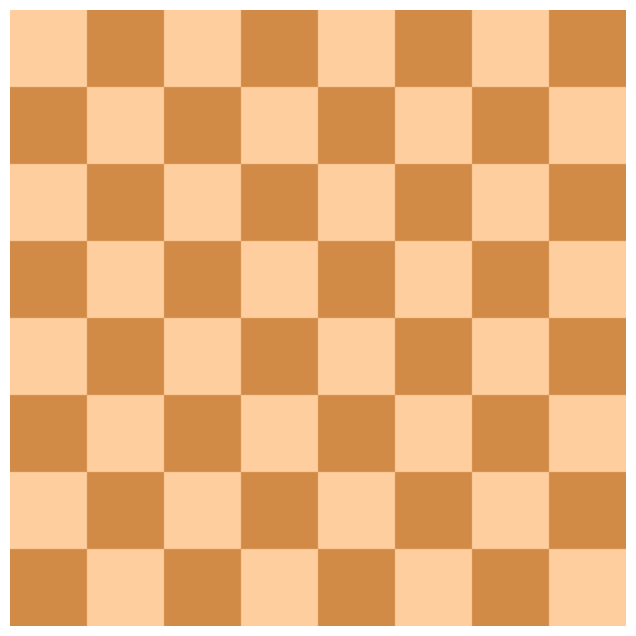

In [50]:
flat_chess_rgb = cv2.cvtColor(flat_chess_bgr, cv2.COLOR_BGR2RGB)

display_img(flat_chess_rgb)

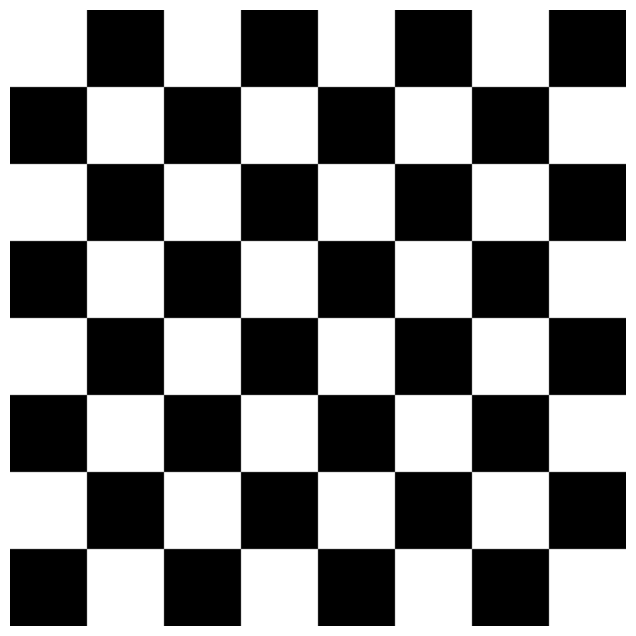

In [51]:
flat_chess_gray = cv2.cvtColor(flat_chess_bgr, cv2.COLOR_BGR2GRAY)

fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.imshow(flat_chess_gray, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

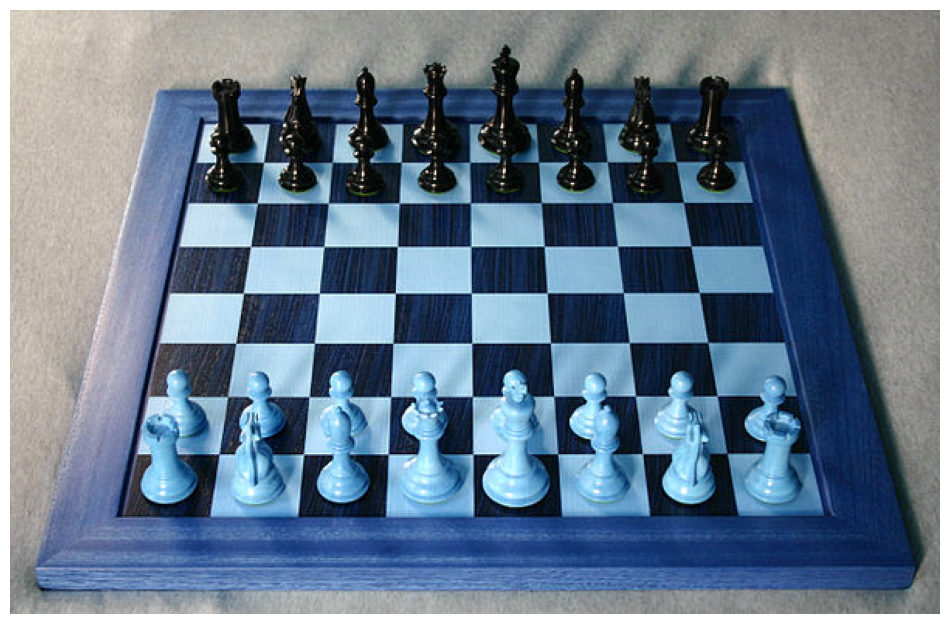

In [52]:
real_chess_bgr = cv2.imread('Data/real_chessboard.jpg')

display_img(real_chess_bgr)

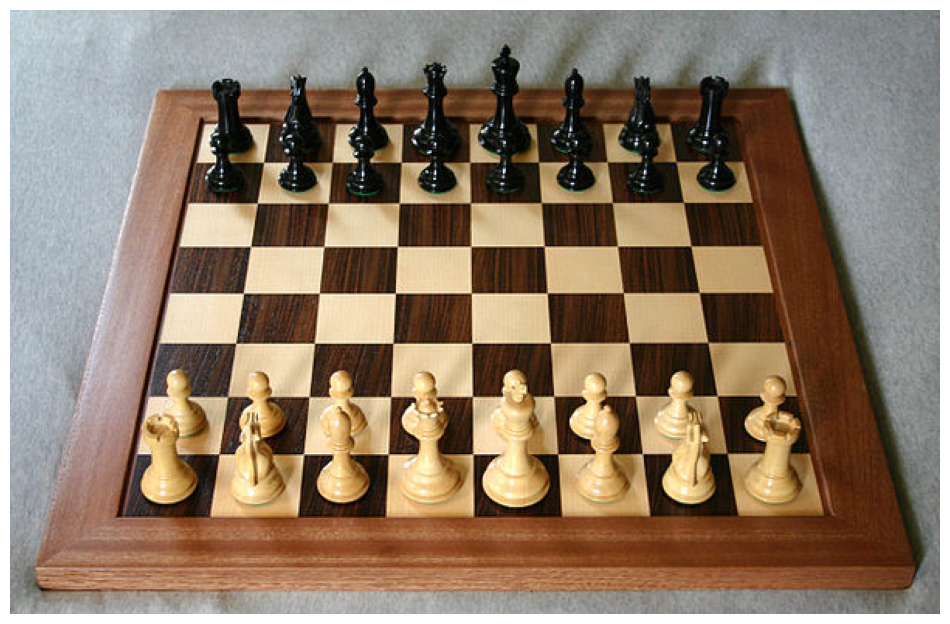

In [53]:
real_chess_rgb = cv2.cvtColor(real_chess_bgr, cv2.COLOR_BGR2RGB)

display_img(real_chess_rgb)

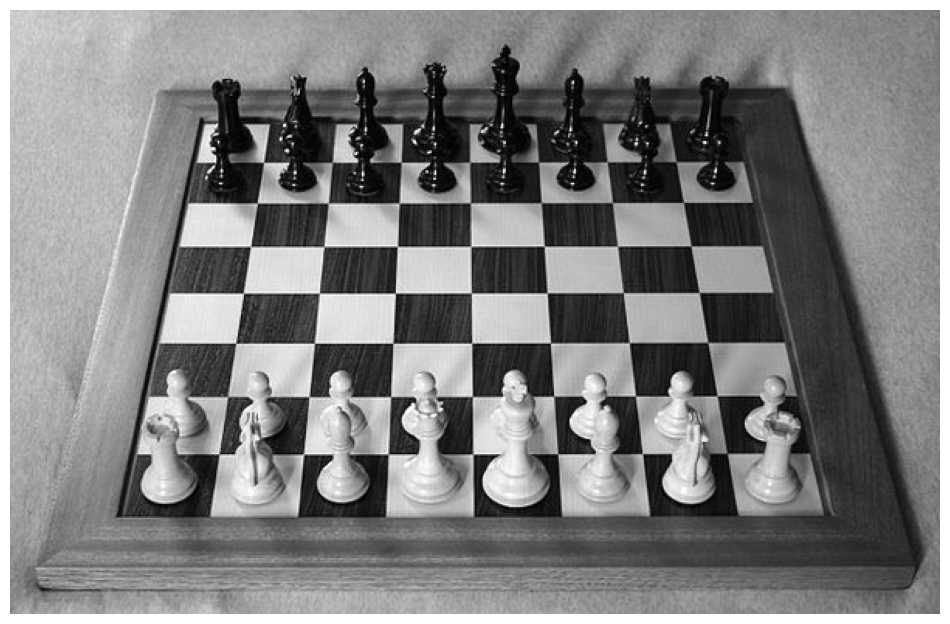

In [54]:
real_chess_gray = cv2.cvtColor(real_chess_bgr, cv2.COLOR_BGR2GRAY)

fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.imshow(real_chess_gray, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

In [55]:
#flat_chess_gray-right now has all integers but for corner detection we need float values:

flat_chess_gray_flt = np.float32(flat_chess_gray)

#same point but with preciusion or float

In [56]:
flat_chess_gray_flt

array([[215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       ...,
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.]], dtype=float32)

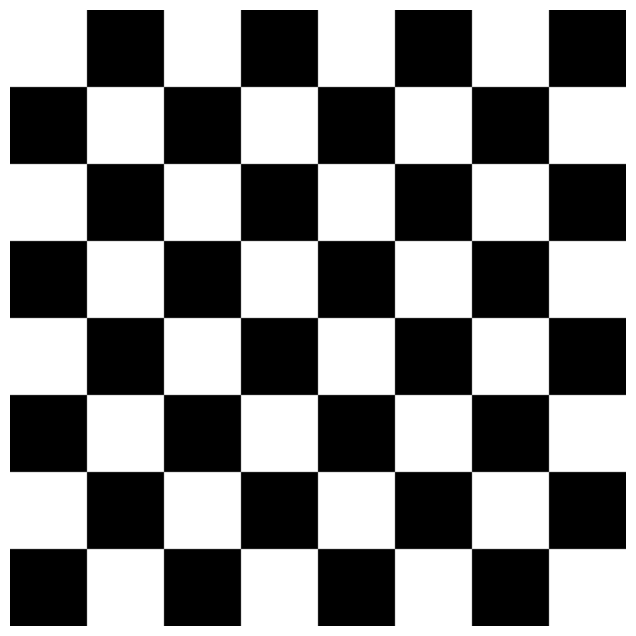

In [57]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.imshow(flat_chess_gray_flt, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

## HARRIS CORNER DETECTION:

#### FLAT IMAGE:

In [58]:
dst = cv2.cornerHarris(src=flat_chess_gray_flt, blockSize=2, ksize=3, k=0.04)

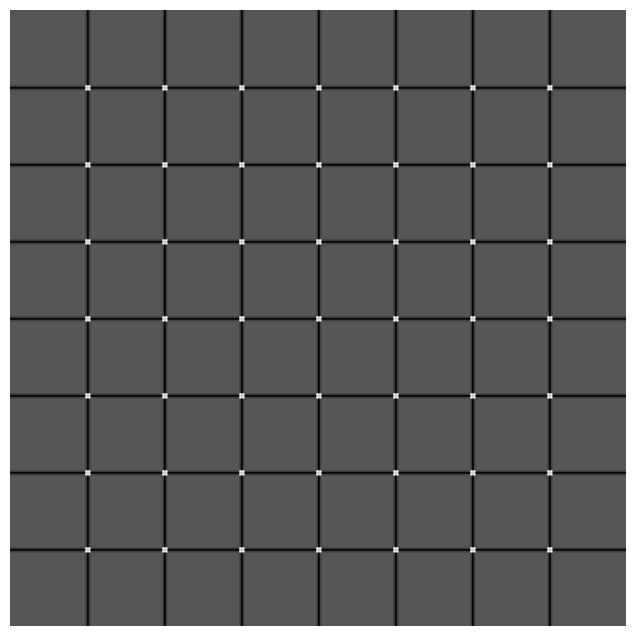

In [59]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.imshow(dst, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

In [60]:
#using morphological operator(dilate) - adding more (opposite to eroding)

dst = cv2.dilate(dst, None)

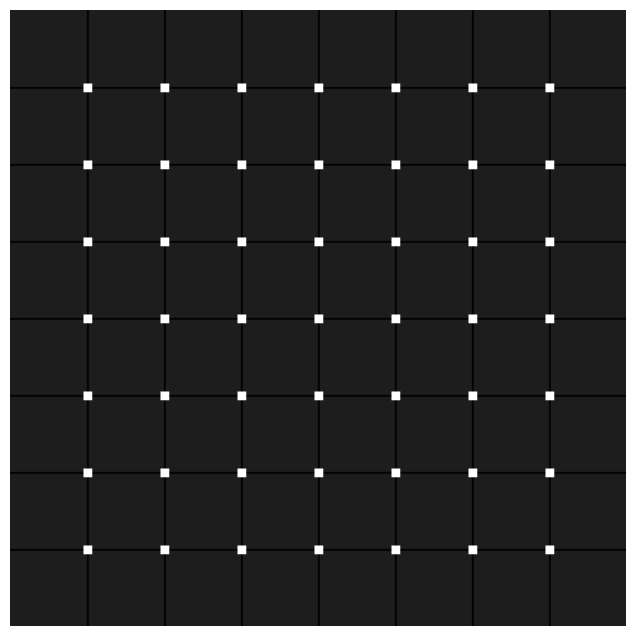

In [61]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.imshow(dst, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

In [62]:
#corner detected original image:
#dst-corner detected black and white image-if value of image is 1% greater than max value of dst
#then flat_chess_rgb[dst>0.01*dst.max()] this returns boolean at that value: then mark as red
#can detect corners on last edges

flat_chess_rgb[dst>0.01*dst.max()] = [255,0,0]

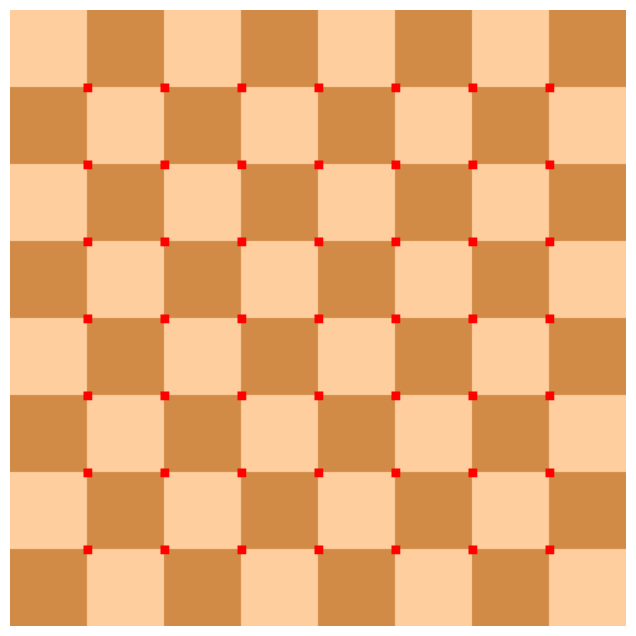

In [63]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.imshow(flat_chess_rgb)
plt.axis('off')
plt.show()
plt.close()

### REAL IMAGE:

In [64]:
real_chess_gray_flt = np.float32(real_chess_gray)

In [65]:
real_chess_gray_flt

array([[206., 200., 198., ..., 118., 118., 123.],
       [199., 196., 195., ..., 117., 115., 116.],
       [209., 210., 208., ..., 129., 127., 127.],
       ...,
       [120., 131., 144., ..., 116., 120., 119.],
       [124., 143., 153., ..., 112., 113., 108.],
       [135., 155., 156., ..., 114., 114., 107.]], dtype=float32)

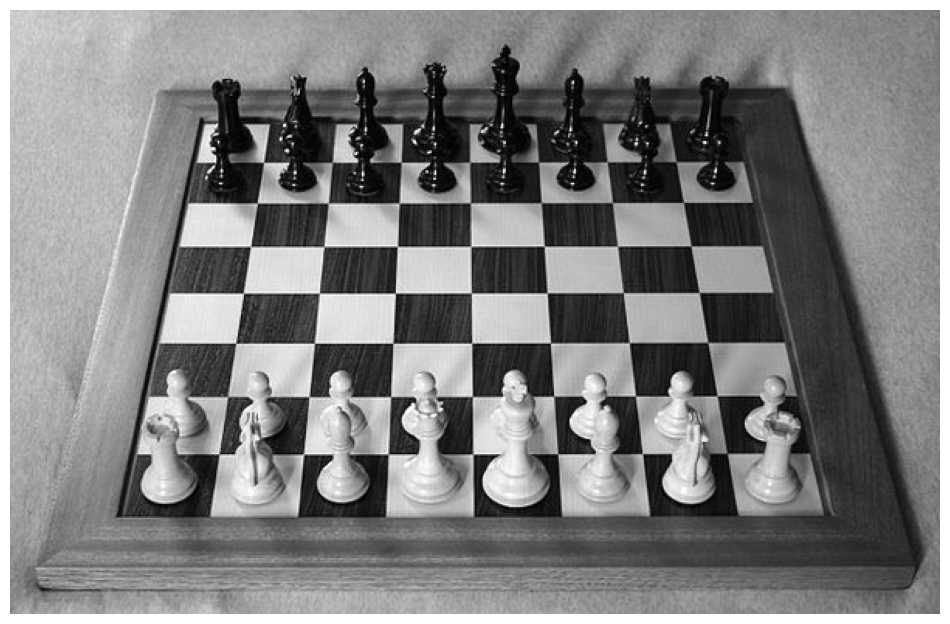

In [66]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.imshow(real_chess_gray_flt, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

In [67]:
dst_real = cv2.cornerHarris(src=real_chess_gray_flt, blockSize=2, ksize=3, k=0.04)

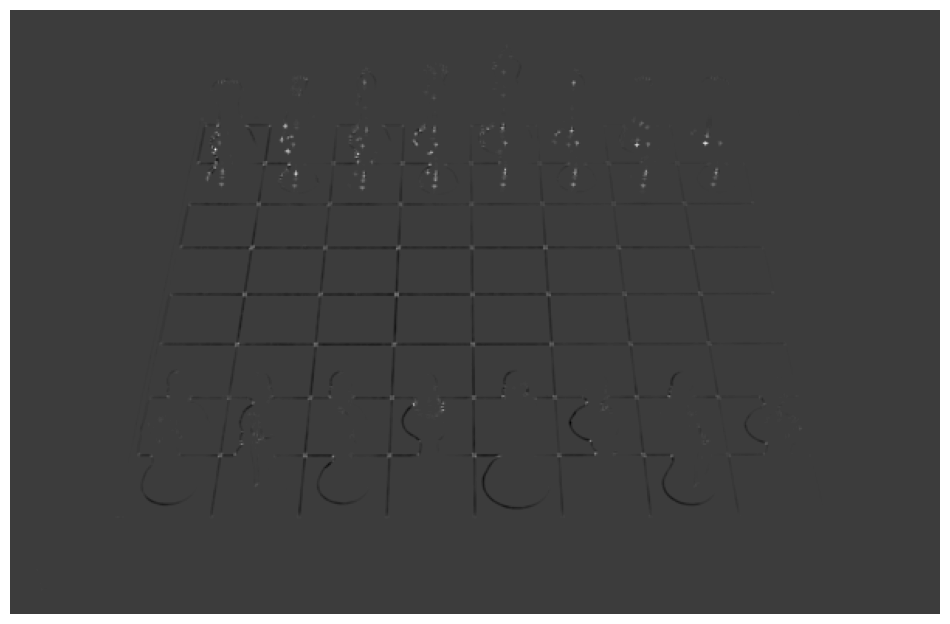

In [68]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.imshow(dst_real, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

In [69]:
dst_real = cv2.dilate(dst_real, None)

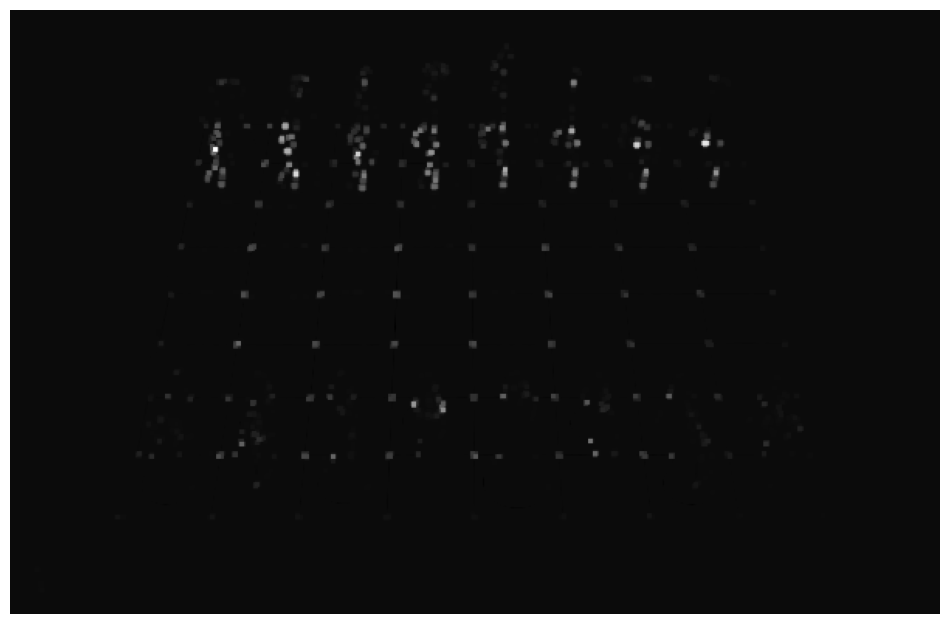

In [70]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.imshow(dst_real, cmap='gray')
plt.axis('off')
plt.show()
plt.close()

In [71]:
real_chess_rgb[dst_real>0.01*dst_real.max()] = [255,0,0]

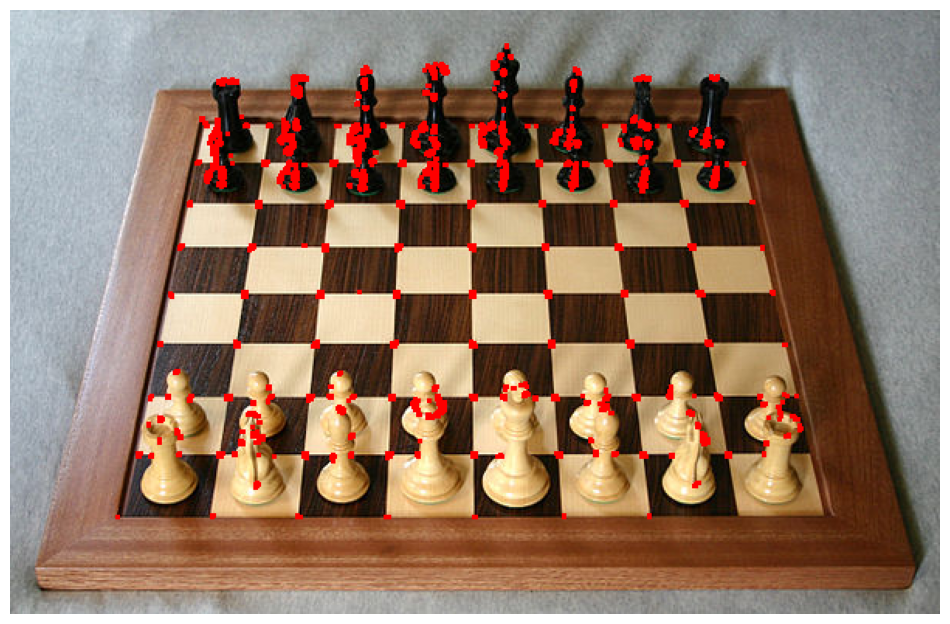

In [72]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.imshow(real_chess_rgb)
plt.axis('off')
plt.show()
plt.close()